In [ ]:
!pip install kaggle # Access Kaggle API
!kaggle datasets download -d andrewmvd/medical-mnist # Download dataset from Kaggle
!unzip /content/medical-mnist.zip -d /content/medical-mnist # Unzip the dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/medical-mnist/HeadCT/005000.jpeg  
  inflating: /content/medical-mnist/HeadCT/005001.jpeg  
  inflating: /content/medical-mnist/HeadCT/005002.jpeg  
  inflating: /content/medical-mnist/HeadCT/005003.jpeg  
  inflating: /content/medical-mnist/HeadCT/005004.jpeg  
  inflating: /content/medical-mnist/HeadCT/005005.jpeg  
  inflating: /content/medical-mnist/HeadCT/005006.jpeg  
  inflating: /content/medical-mnist/HeadCT/005007.jpeg  
  inflating: /content/medical-mnist/HeadCT/005008.jpeg  
  inflating: /content/medical-mnist/HeadCT/005009.jpeg  
  inflating: /content/medical-mnist/HeadCT/005010.jpeg  
  inflating: /content/medical-mnist/HeadCT/005011.jpeg  
  inflating: /content/medical-mnist/HeadCT/005012.jpeg  
  inflating: /content/medical-mnist/HeadCT/005013.jpeg  
  inflating: /content/medical-mnist/HeadCT/005014.jpeg  
  inflating: /content/medical-mnist/HeadCT/005015.jpeg  
  inflating: /content/medical-mnist/H

# Building a Convolutional Neural Network of Medical Image Classifier

# Importing the Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Importing the Dataset

In [ ]:
dataset_directory = '/content/medical-mnist'


# Load the training dataset - split into 3 sets for training, validation and testing
X_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    image_size=(64, 64),
    labels='inferred',
    shuffle=True,
    validation_split=0.4,  # 40% will be saved for validation + test
    subset="training",     # First load the training data subset (60%)
    seed=123
)

# Load the validation dataset
validation_and_test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    image_size=(64, 64),
    labels='inferred',
    shuffle=True,
    validation_split=0.4,  # Split off 40% for validation and testing
    subset="validation",   # This is the validation set
    seed=123
)

# Split the validation_and_test_dataset into 20% validation and 20% testing


# Create validation dataset
validation_size = int(len(validation_and_test_dataset)//2)  # Split the 40% in half
test_size = len(validation_and_test_dataset) - validation_size  # The rest goes to testing

# 20% validation
X_cv = validation_and_test_dataset.take(validation_size)

# 20% testing
X_test = validation_and_test_dataset.skip(validation_size)



Found 58954 files belonging to 6 classes.
Using 35373 files for training.
Found 58954 files belonging to 6 classes.
Using 23581 files for validation.


# Build the Model
describe architecture

In [ ]:
model = Sequential([
    tf.keras.layers.Rescaling(1./255),  # Normalize pixel values to [0, 1]
    # Conv1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    # Conv2
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    # Conv3
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # Flatten
    tf.keras.layers.Flatten(),
    # Fully Connected Layers
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
    ])





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


# Train the Model

In [ ]:
loss_plot = model.fit(X_train, epochs=10, validation_data=(X_cv))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1106/1106 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9356 - loss: 0.1668 - val_accuracy: 0.9986 - val_loss: 0.0054
Epoch 2/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9946 - loss: 0.0209 - val_accuracy: 0.9992 - val_loss: 0.0045
Epoch 3/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9983 - loss: 0.0072 - val_accuracy: 0.9984 - val_loss: 0.0089
Epoch 4/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9951 - loss: 0.0325 - val_accuracy: 0.9988 - val_loss: 0.0052
Epoch 5/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9988 - loss: 0.0052 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 6/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 0.9966 - val_loss: 0.0140
Epoch 7/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9975 - loss: 0.0099 - val_accuracy: 0.9997 - val_loss: 0.0017
Epoch 8/10
1106/1106 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9984 - loss: 0.0073 - val

# Asses Generalization

Plot the accuracy and loss of training and validation set to monitor the model's performance during training.



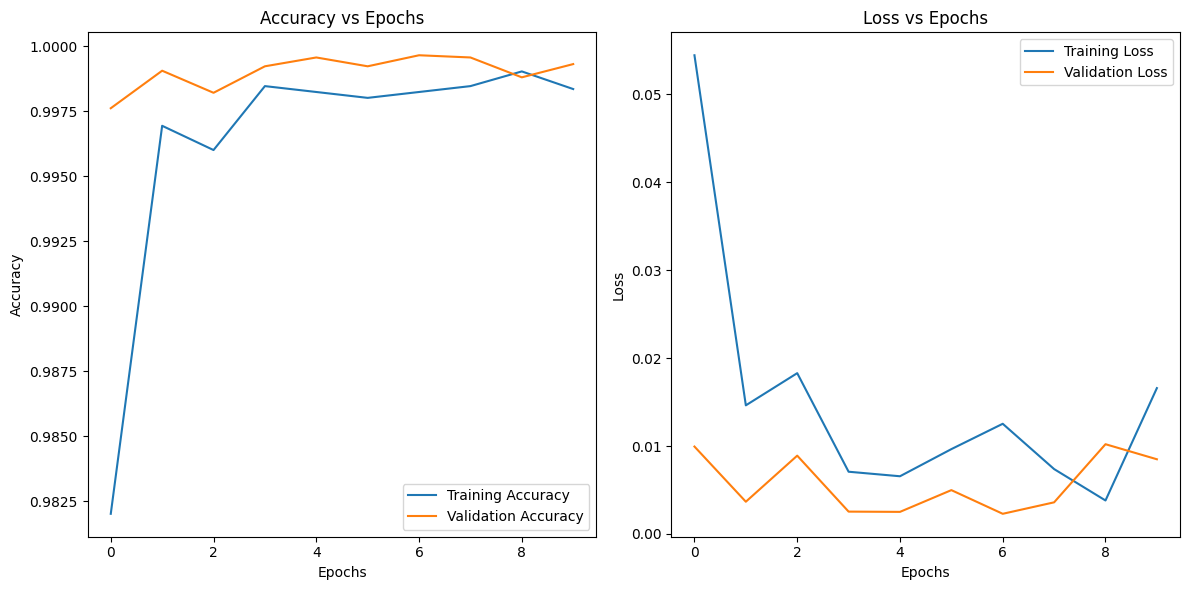

In [ ]:
# Plotting Accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(loss_plot.history['accuracy'], label='Training Accuracy')
plt.plot(loss_plot.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(loss_plot.history['loss'], label='Training Loss')
plt.plot(loss_plot.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation

 Final evaluation of the model's performance on truly unseen data.


In [ ]:
test_loss, test_acc = model.evaluate(X_test)

369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9990 - loss: 0.0079
